Импортируем библиотеки и вынружаем очищенный набор данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plot

df = pd.read_csv('vgsales_4.csv')
df


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,435,Club Penguin: Elite Penguin Force,DS,2008.0,Adventure,Disney Interactive Studios,1.88,0.98,0.00,0.30,3.16
1,13444,Secret Files: Tunguska,PC,2006.0,Adventure,DreamCatcher Interactive,0.00,0.04,0.00,0.01,0.05
2,10126,ECW Anarchy Rulz,PS,1999.0,Fighting,Acclaim Entertainment,0.06,0.04,0.00,0.01,0.11
3,7585,Taiko no Tatsujin: Waku Waku Anime Matsuri,PS2,2003.0,Misc,Namco Bandai Games,0.00,0.00,0.20,0.00,0.20
4,10242,Breakout,PS,1999.0,Puzzle,Hasbro Interactive,0.06,0.04,0.00,0.01,0.11
...,...,...,...,...,...,...,...,...,...,...,...
548,11703,Genkai Totsuki Moero Chronicle,PSV,2014.0,Role-Playing,Compile Heart,0.00,0.00,0.08,0.00,0.08
549,13732,GoGo's Crazy Bones,DS,2012.0,Action,GameMill Entertainment,0.00,0.04,0.00,0.00,0.04
550,701,Yokai Watch Busters,3DS,2015.0,Action,Level 5,0.00,0.00,2.28,0.00,2.28
551,12849,Princess on Ice,DS,2008.0,Sports,505 Games,0.04,0.01,0.00,0.00,0.05


countplot() создаёт график, позволяющий продемонстрировать количество наблюдений в наборе данных в каждой категориальной ячейке с помощью столбцов.

На графике ниже можно сказать, что наибольшее количество игр было выпущено на DS и PS2, третьими были PSP. На последним месте 3DO и NG.

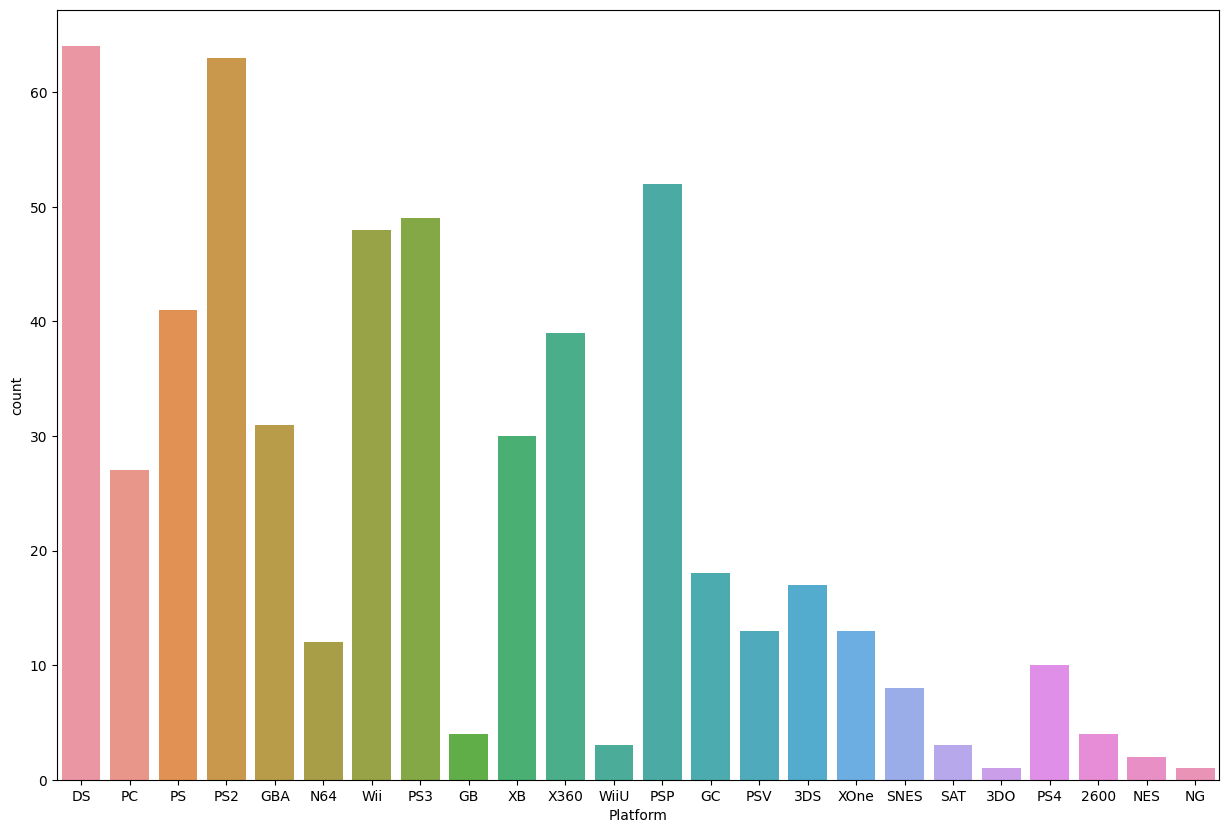

In [2]:
graph = sns.countplot(x="Platform", data = df)
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

barplot() аггрегирует данные по значениям категориальной переменной и применяет определённую функцию к значениям соответсвующих групп цифровой переменной. По умолчанию эта функция — среднее.

На графике ниже наибольшее количество мировых продаж видеоигр приходится на GB , второй идёт N64 , третьей PS4. Плафтормой с наименьшими продажами является 3DO и NG.


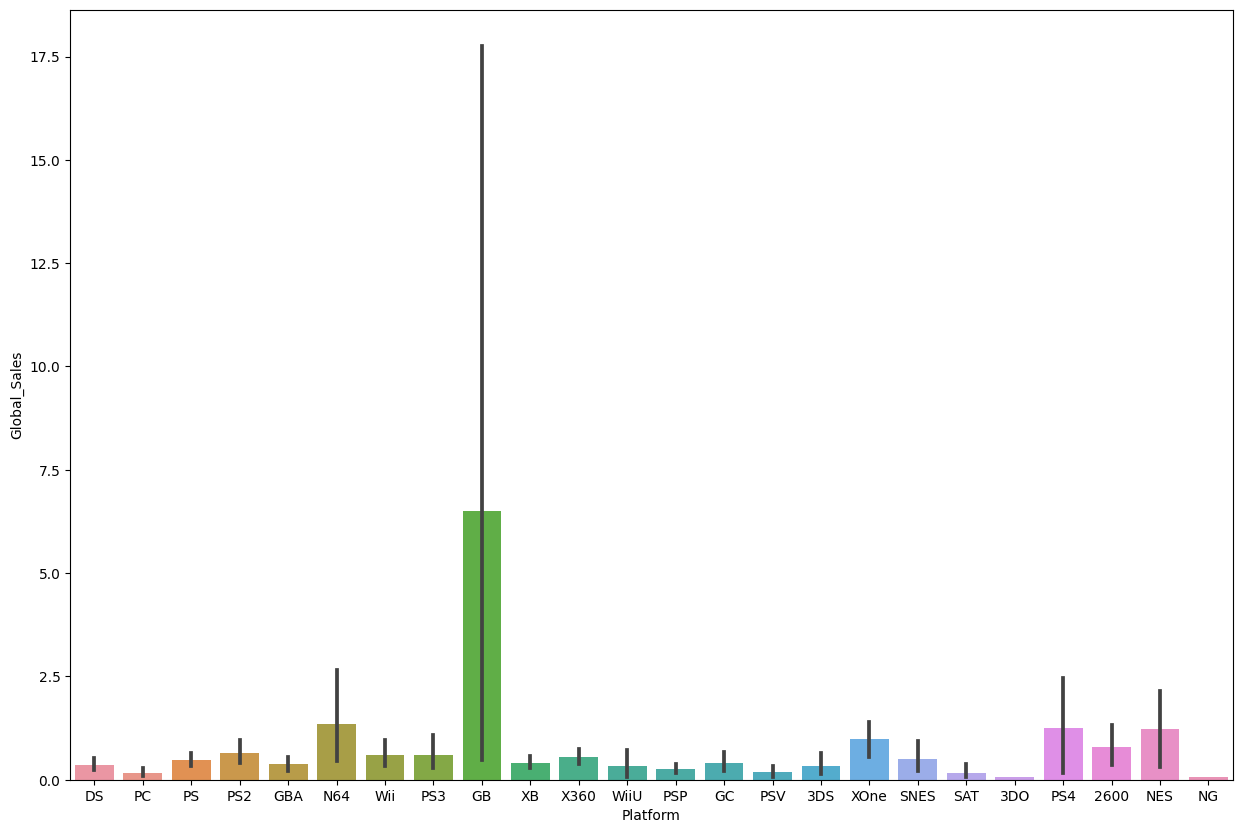

In [3]:
graph = sns.barplot(x=df["Platform"], y=df["Global_Sales"])
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

boxplot() — ящик с усами или диаграмма размаха. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.

По графику можно наблюдать, что самыми продаваемыми играми по жанру являются шутеры (Shoter), вторым идут платформеры (Platform), третьими идут шутеры (Racing). Самым непопулярным жанром являются стратегии (Strategy).


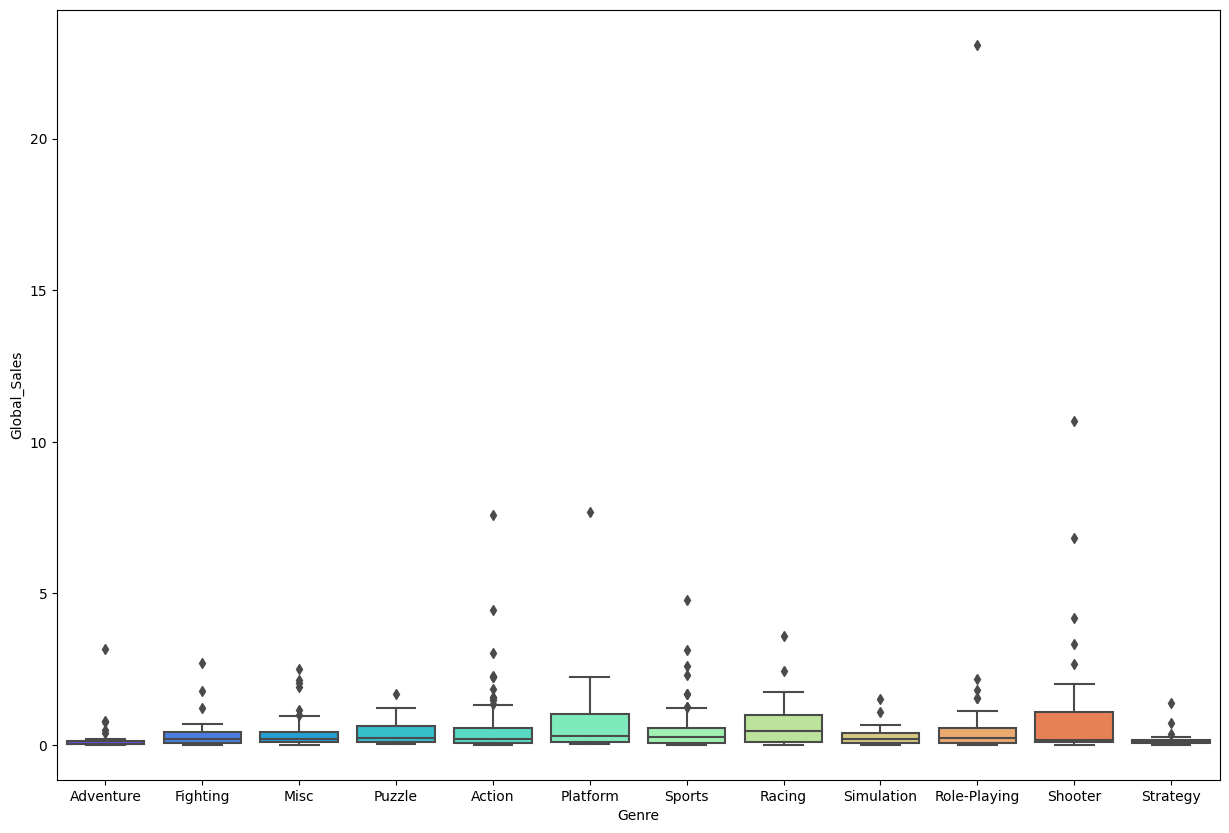

In [4]:
graph = sns.boxplot(x="Genre", y="Global_Sales",data = df,palette='rainbow')
graph.figure.set_figwidth(15)
graph.figure.set_figheight(10) 

Тепловая карта (heatmap()) - это метод визуализации данных, который показывает величину явления в виде цвета в двух измерениях.

Диаграмма ниже предназначена для температурных данных. В данной сфере она не совсем корректна. Но если описать то зависимость между числами Rank и Global_Sales минимальна из интервала.

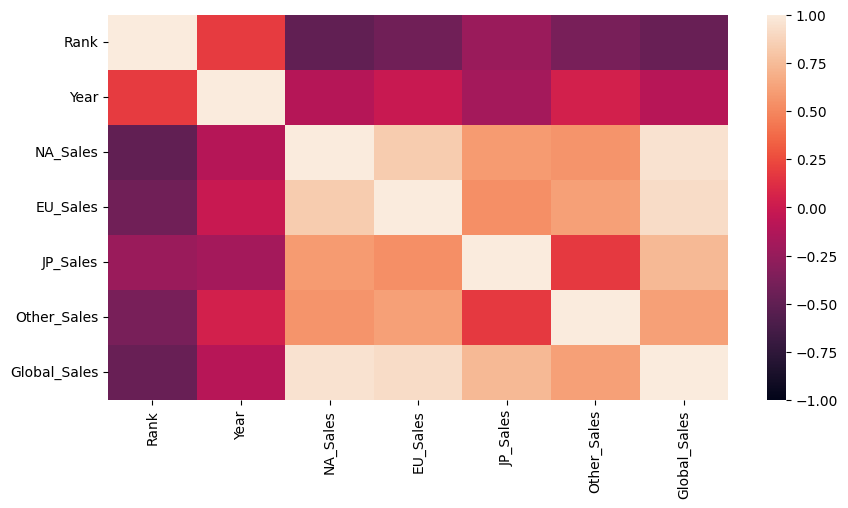

In [5]:
MyHeatMap = sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1)
MyHeatMap.figure.set_figwidth(10)
MyHeatMap.figure.set_figheight(5)

pairplot() - построение попарных взаимосвязей в наборе данных.

В диаграмме ниже представлено сравнение всех числовых столбцов между собой.

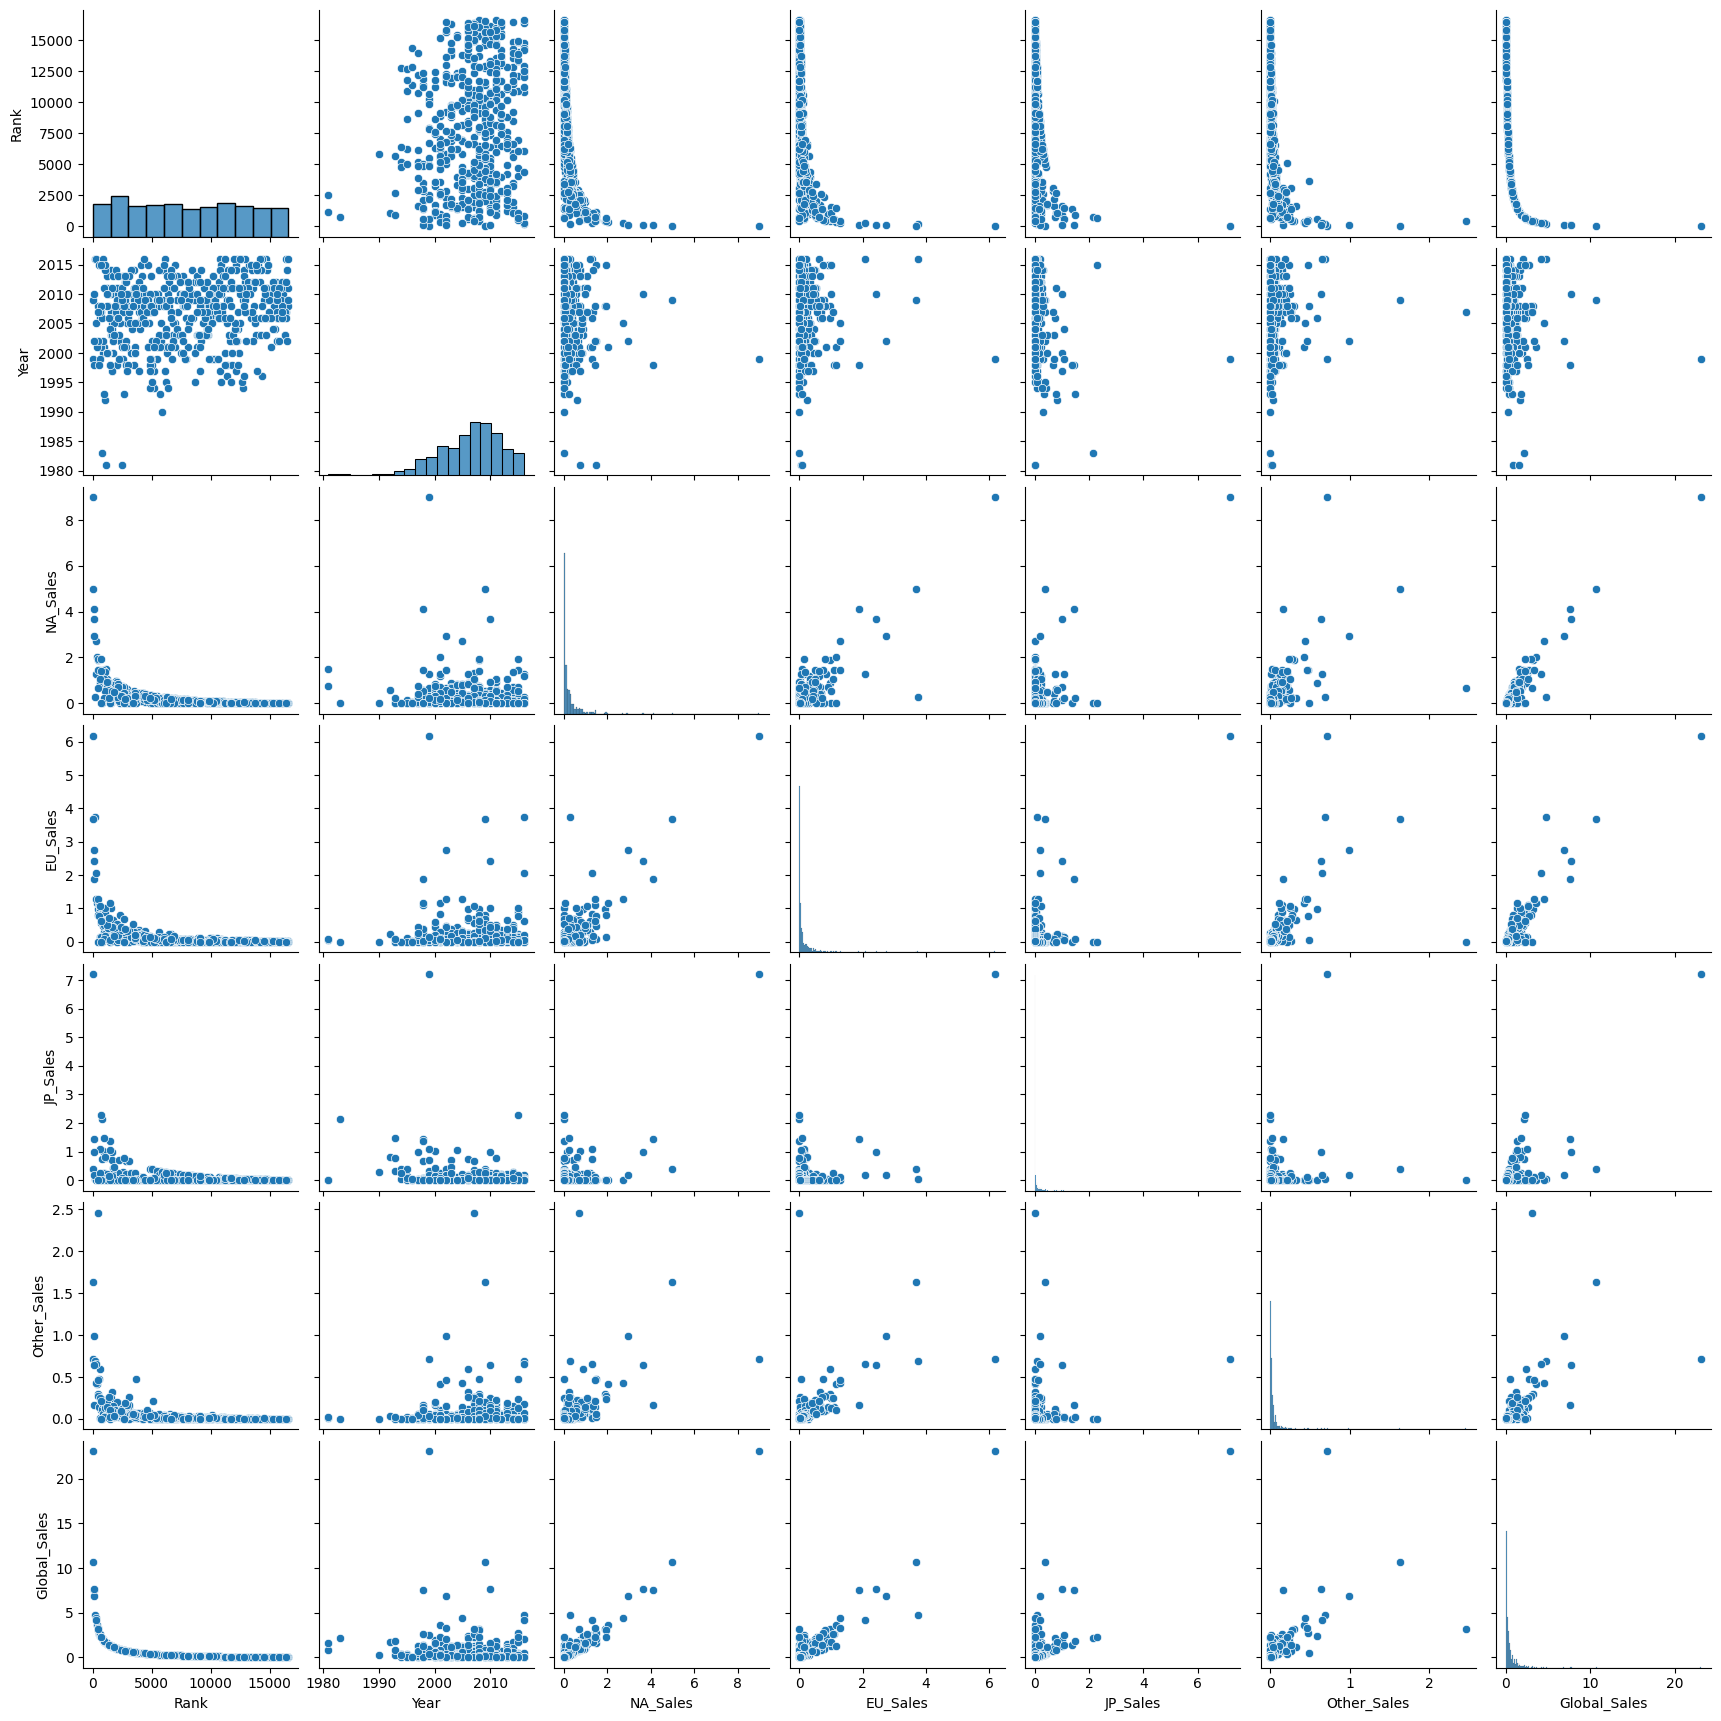

In [6]:
graph = sns.pairplot(df)

PairGrid() - сетка подзаголовков для построения попарных взаимосвязей в наборе данных.

Диаграмма ниже имеет те же функции, что и предыдущая, но визуал отличается благодаря кругам.

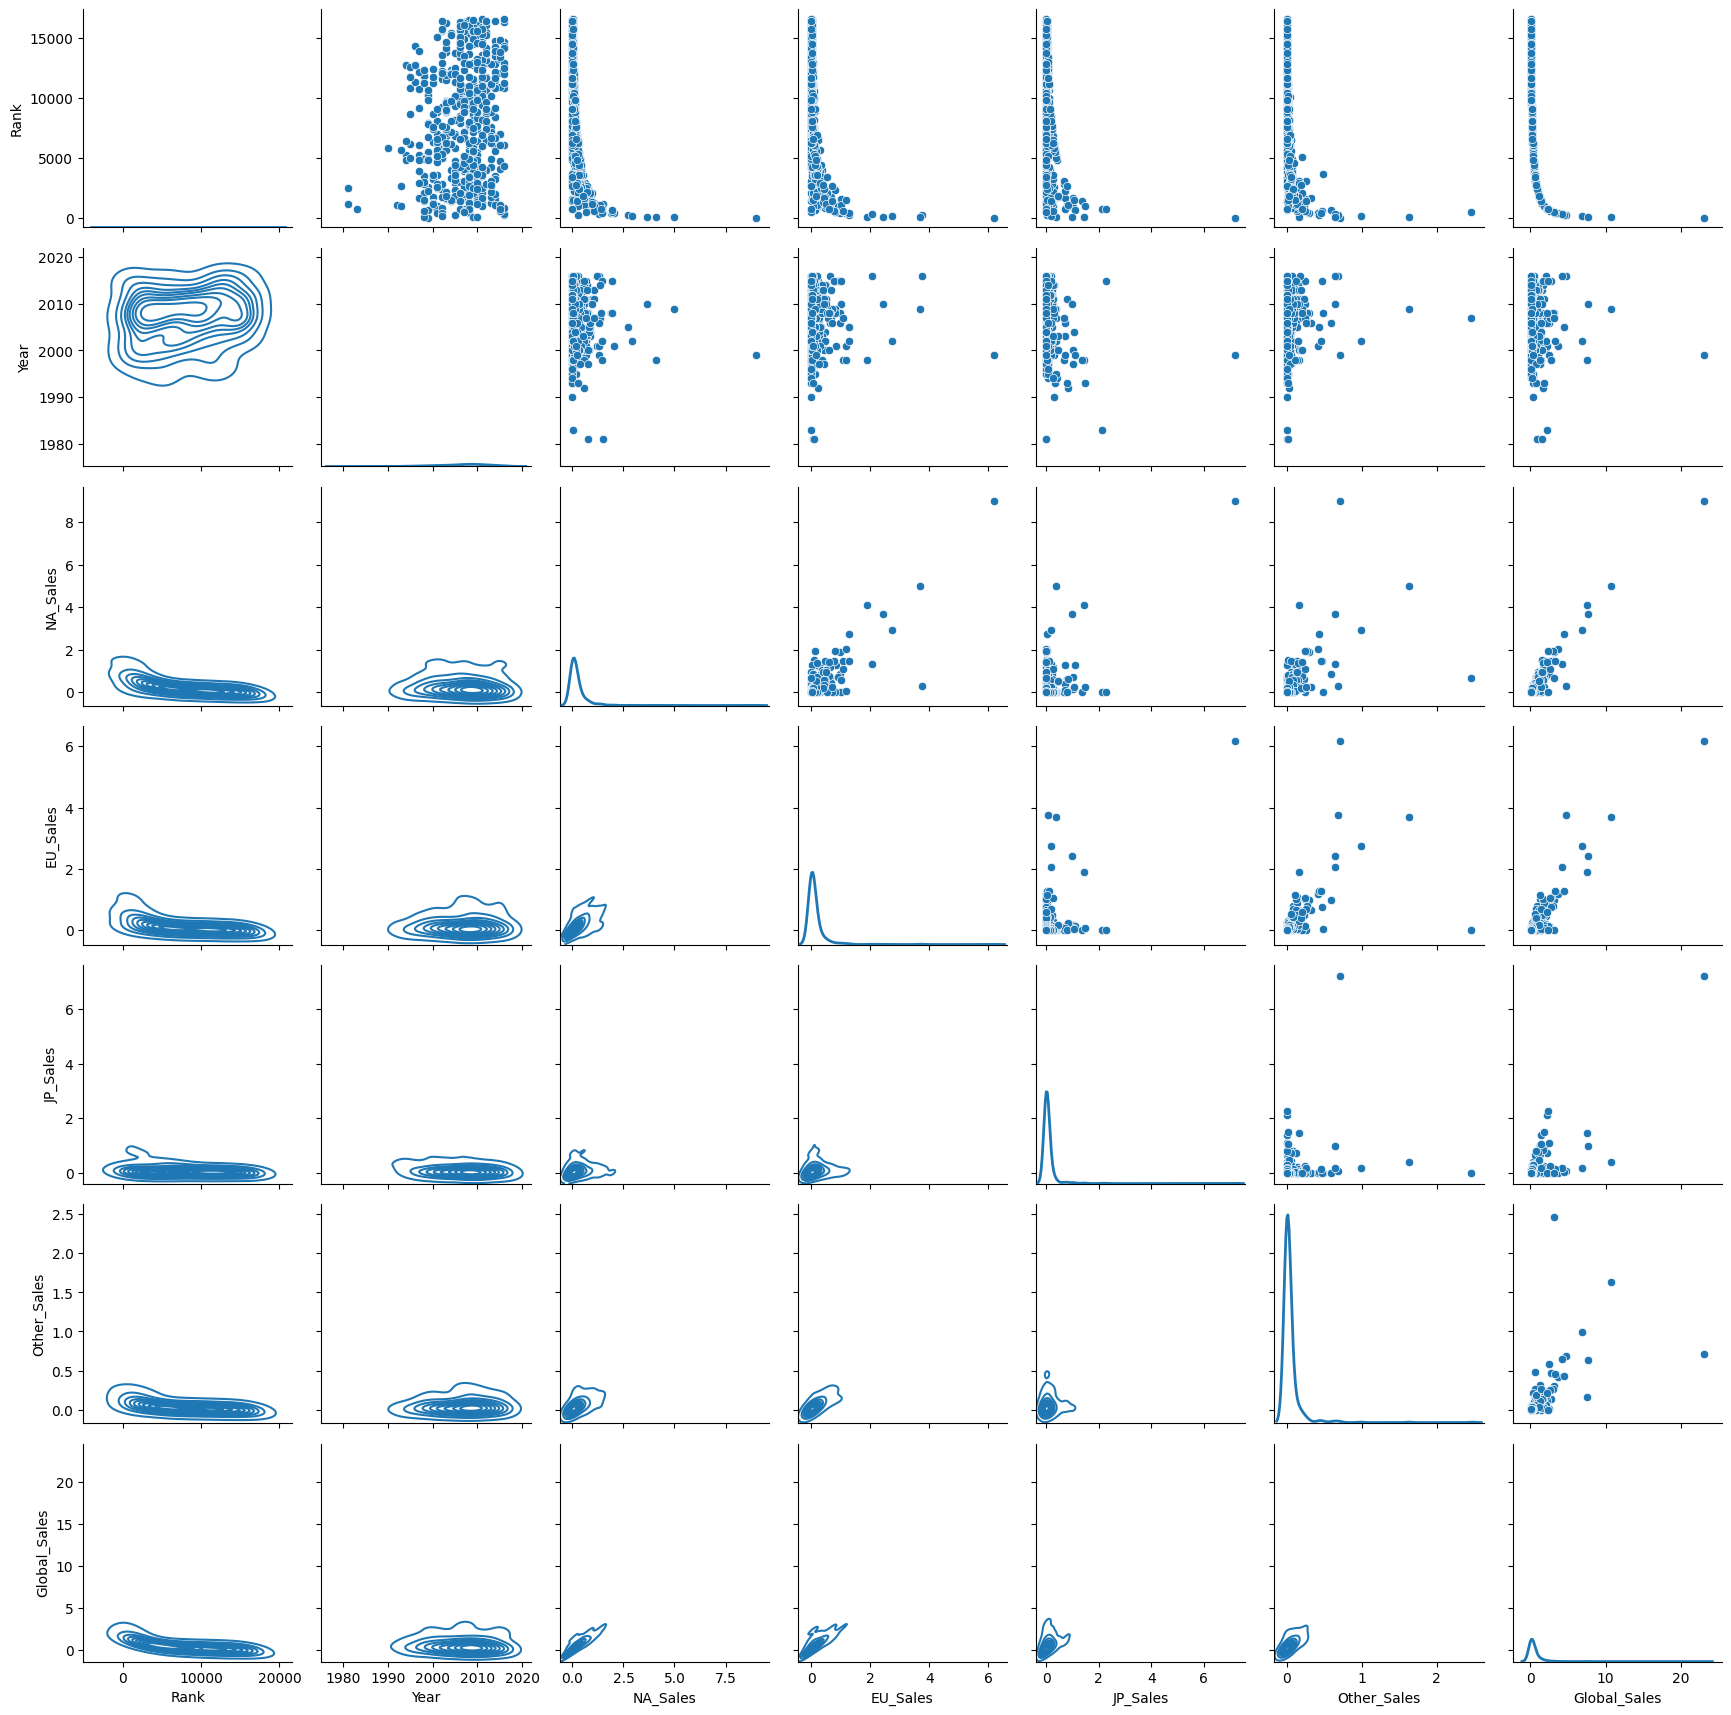

In [7]:
graph = sns.PairGrid(df)
graph = graph.map_upper(sns.scatterplot)
graph = graph.map_lower(sns.kdeplot)
graph = graph.map_diag(sns.kdeplot, lw = 2)

Кластеризация — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

В таблице ниде мы выбираем столбцы и выводим только значения, кратные 50.

In [8]:
df_mini = df[["NA_Sales","EU_Sales","JP_Sales"]][::50]
df_mini

,NA_Sales,EU_Sales,JP_Sales
0,1.88,0.98,0.00
50,1.19,0.29,0.24
100,0.11,0.00,0.00
150,0.00,0.00,0.05
200,0.03,0.01,0.00
250,0.08,0.02,0.00
300,0.37,0.25,0.00
350,0.12,0.05,0.00
400,0.09,0.07,0.00
450,0.26,0.19,0.22


Выбираем количество кластеров, после проводим моделироание. С помощью метода predict выводим точки и записываем их в отдельный столбец. 

In [9]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)

model.fit(df_mini)

all_predictions = model.predict(df_mini)

df_mini["KMeans"] = all_predictions

df_mini


c:\Users\dmaxm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,NA_Sales,EU_Sales,JP_Sales,KMeans
0,1.88,0.98,0.00,2
50,1.19,0.29,0.24,2
100,0.11,0.00,0.00,0
150,0.00,0.00,0.05,0
200,0.03,0.01,0.00,0
250,0.08,0.02,0.00,0
300,0.37,0.25,0.00,0
350,0.12,0.05,0.00,0
400,0.09,0.07,0.00,0
450,0.26,0.19,0.22,0


Вывод KMeans в диграмме, которая показывает количество.

<Axes: xlabel='count', ylabel='KMeans'>

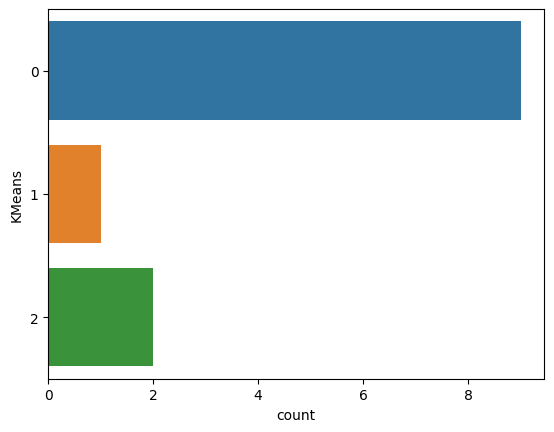

In [10]:
sns.countplot(data = df_mini, y = "KMeans")

Вывод Kmeans на pairplot диаграмме, которая отображает подмножества из нового столбца в тех столбцах, которые указаны в параметре.

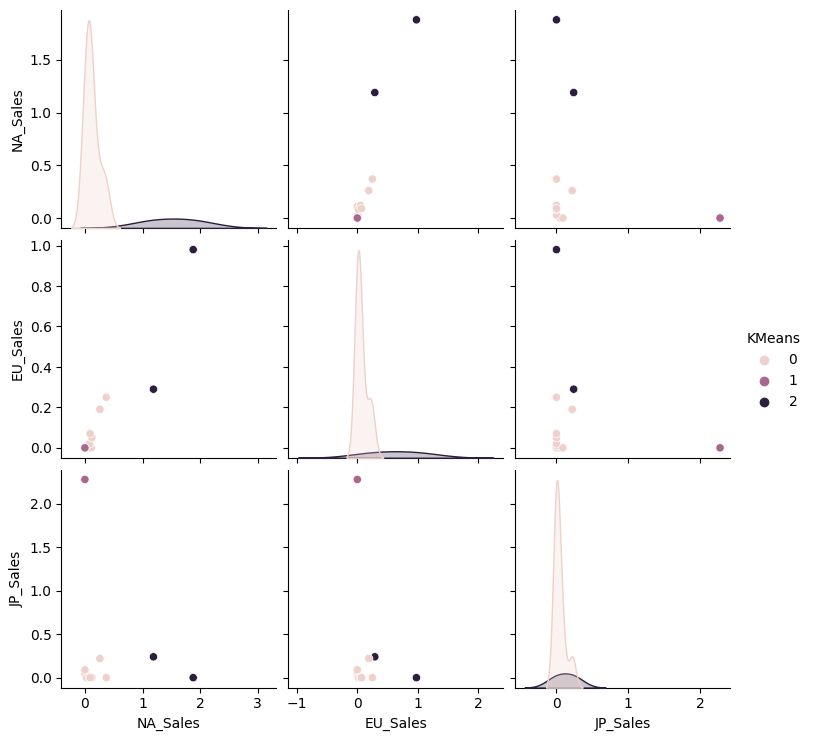

In [11]:
sns.pairplot(df_mini,hue="KMeans")